<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/regression_decission_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [3]:
from sklearn.datasets import make_regression

In [5]:
data, target = make_regression(n_samples = 200, n_features = 1, noise = 20)
target = target ** 2
print(data[:5])
print(target[:5])

[[ 0.98866414]
 [-0.09024705]
 [ 0.00282831]
 [-0.20344244]
 [ 0.23701612]]
[5651.37246583 1231.31989387  622.4095421   417.35707244  105.84974916]


Regresja liniowa

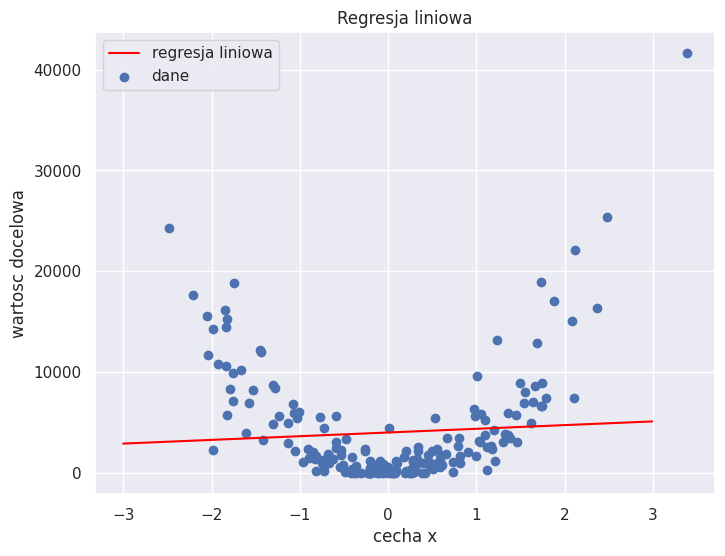

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1,1)

plt.figure(figsize = (8,6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c = 'red', label = 'regresja liniowa')
plt.scatter(data, target, label = 'dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('wartosc docelowa')
plt.show()

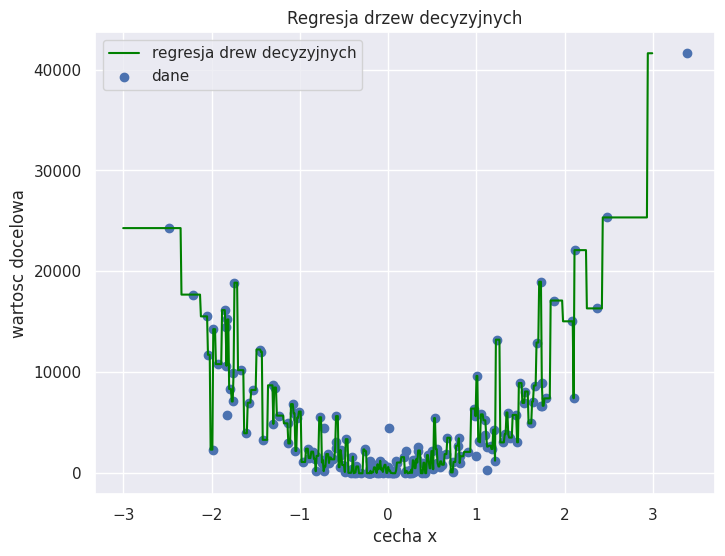

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize = (8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c = 'green', label = 'regresja drew decyzyjnych')
plt.scatter(data, target, label = 'dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('wartosc docelowa')
plt.show()

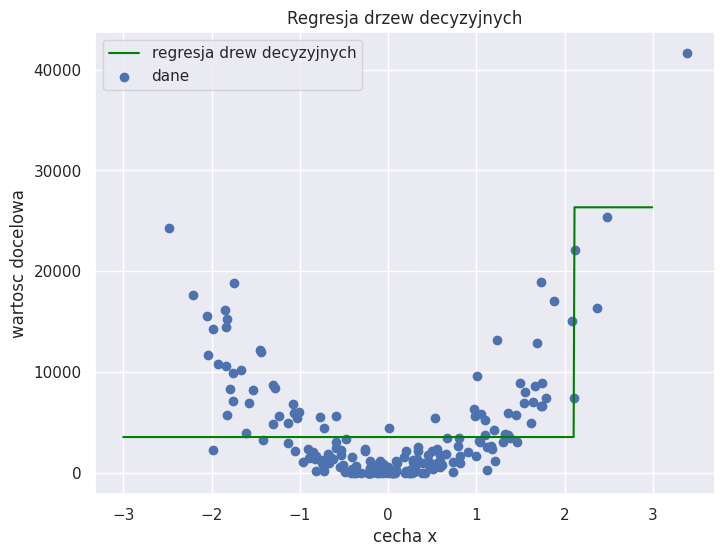

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 1)
regressor.fit(data, target)

plt.figure(figsize = (8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c = 'green', label = 'regresja drew decyzyjnych')
plt.scatter(data, target, label = 'dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('wartosc docelowa')
plt.show()

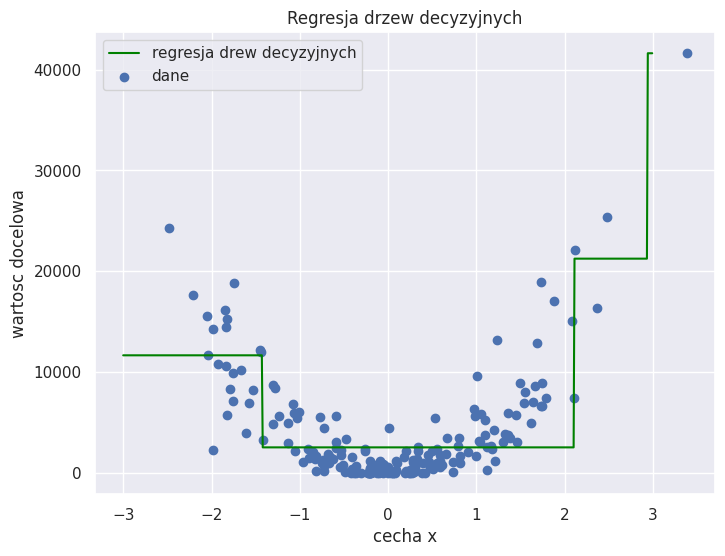

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2)
regressor.fit(data, target)

plt.figure(figsize = (8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c = 'green', label = 'regresja drew decyzyjnych')
plt.scatter(data, target, label = 'dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('wartosc docelowa')
plt.show()

Graf drzewa decyzyjnego

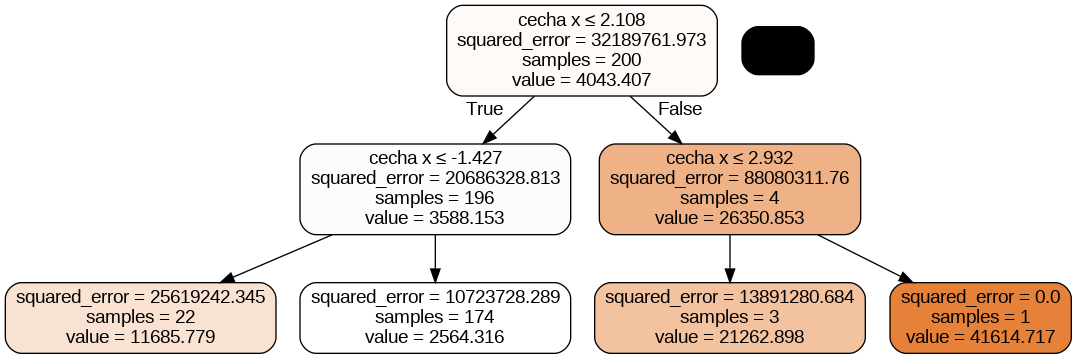

In [17]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True,
                feature_names = ['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width = 600)

model drzewa decyzyjnego - budowa funkcji

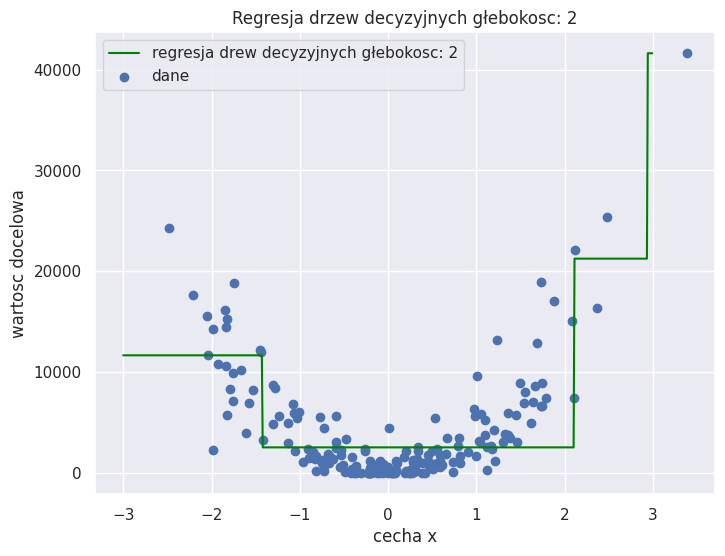

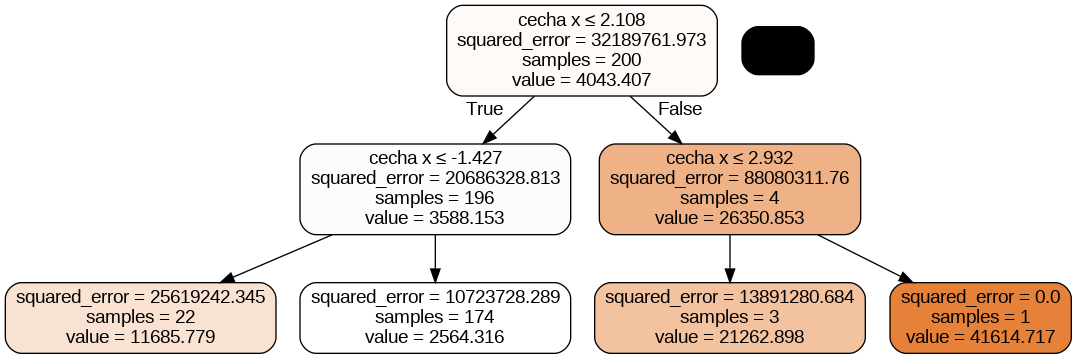

In [27]:
def make_dt_regressor(max_depth = 2):
    regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = max_depth)
    regressor.fit(data, target)

    plt.figure(figsize = (8,6))
    plt.title(f'Regresja drzew decyzyjnych głebokosc: {max_depth}')
    plt.plot(plot_data, regressor.predict(plot_data), c = 'green', label = f'regresja drew decyzyjnych głebokosc: {max_depth}')
    plt.scatter(data, target, label = 'dane')
    plt.legend()
    plt.xlabel('cecha x')
    plt.ylabel('wartosc docelowa')
    plt.show()

    dot_data = StringIO()
    export_graphviz(regressor, out_file = dot_data,
                    filled = True, rounded = True,
                    special_characters = True,
                    feature_names = ['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width = 600 + 100 * max_depth)

make_dt_regressor(max_depth = 2)

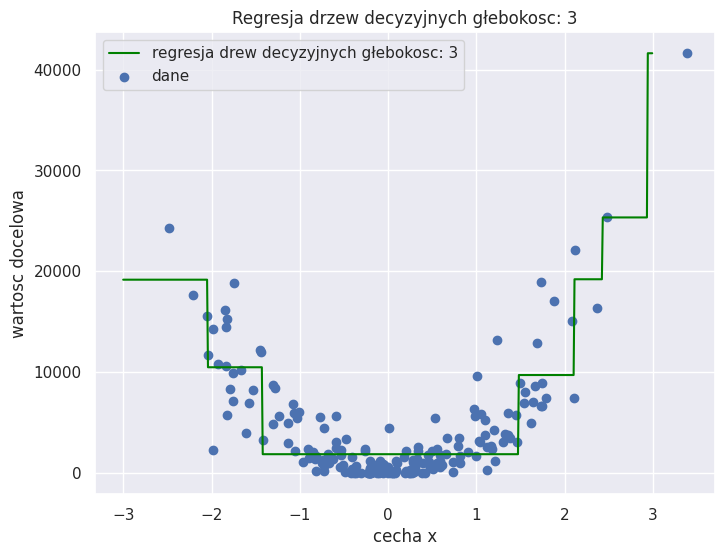

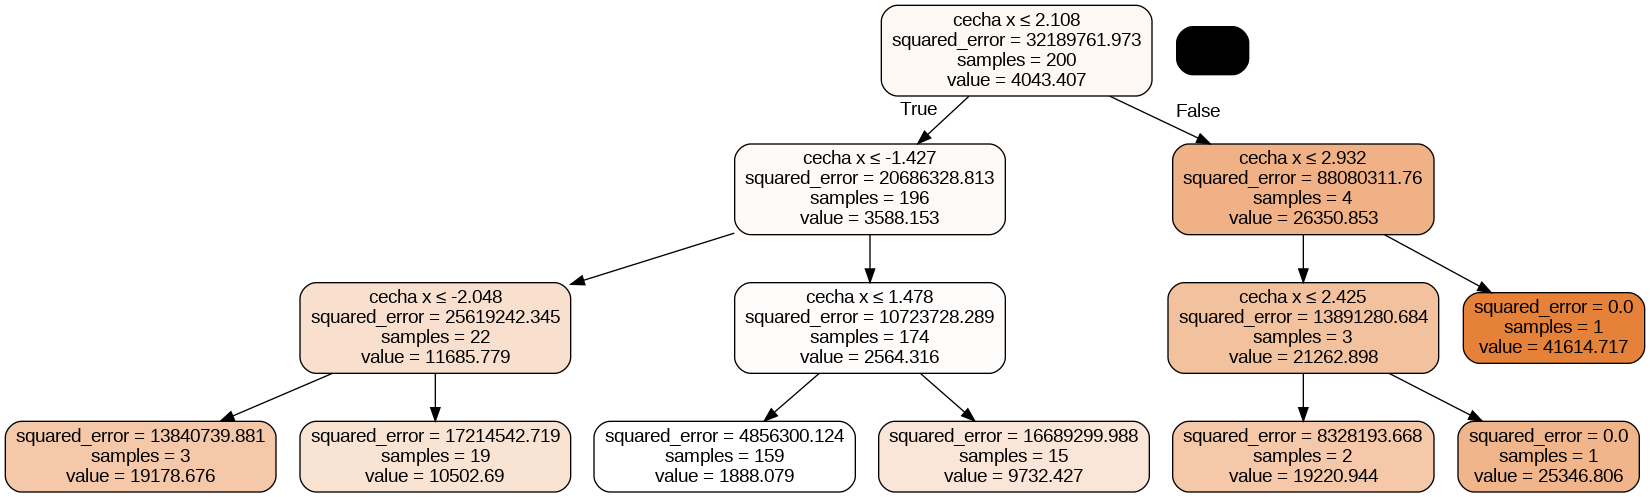

In [28]:
make_dt_regressor(max_depth = 3)

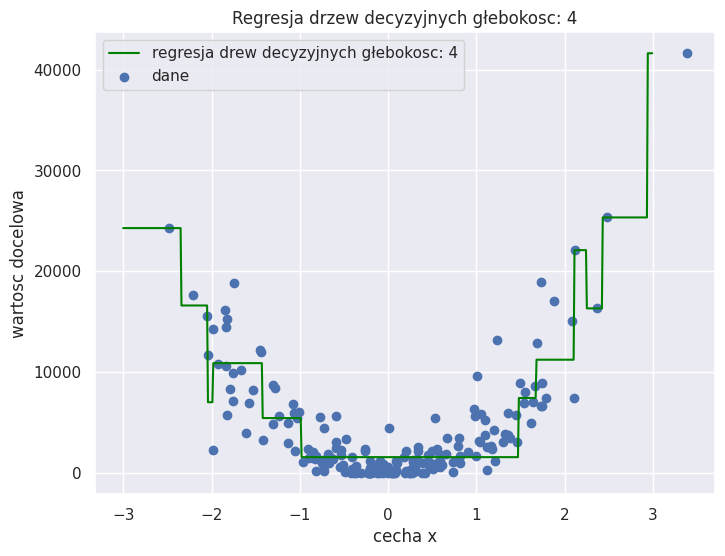

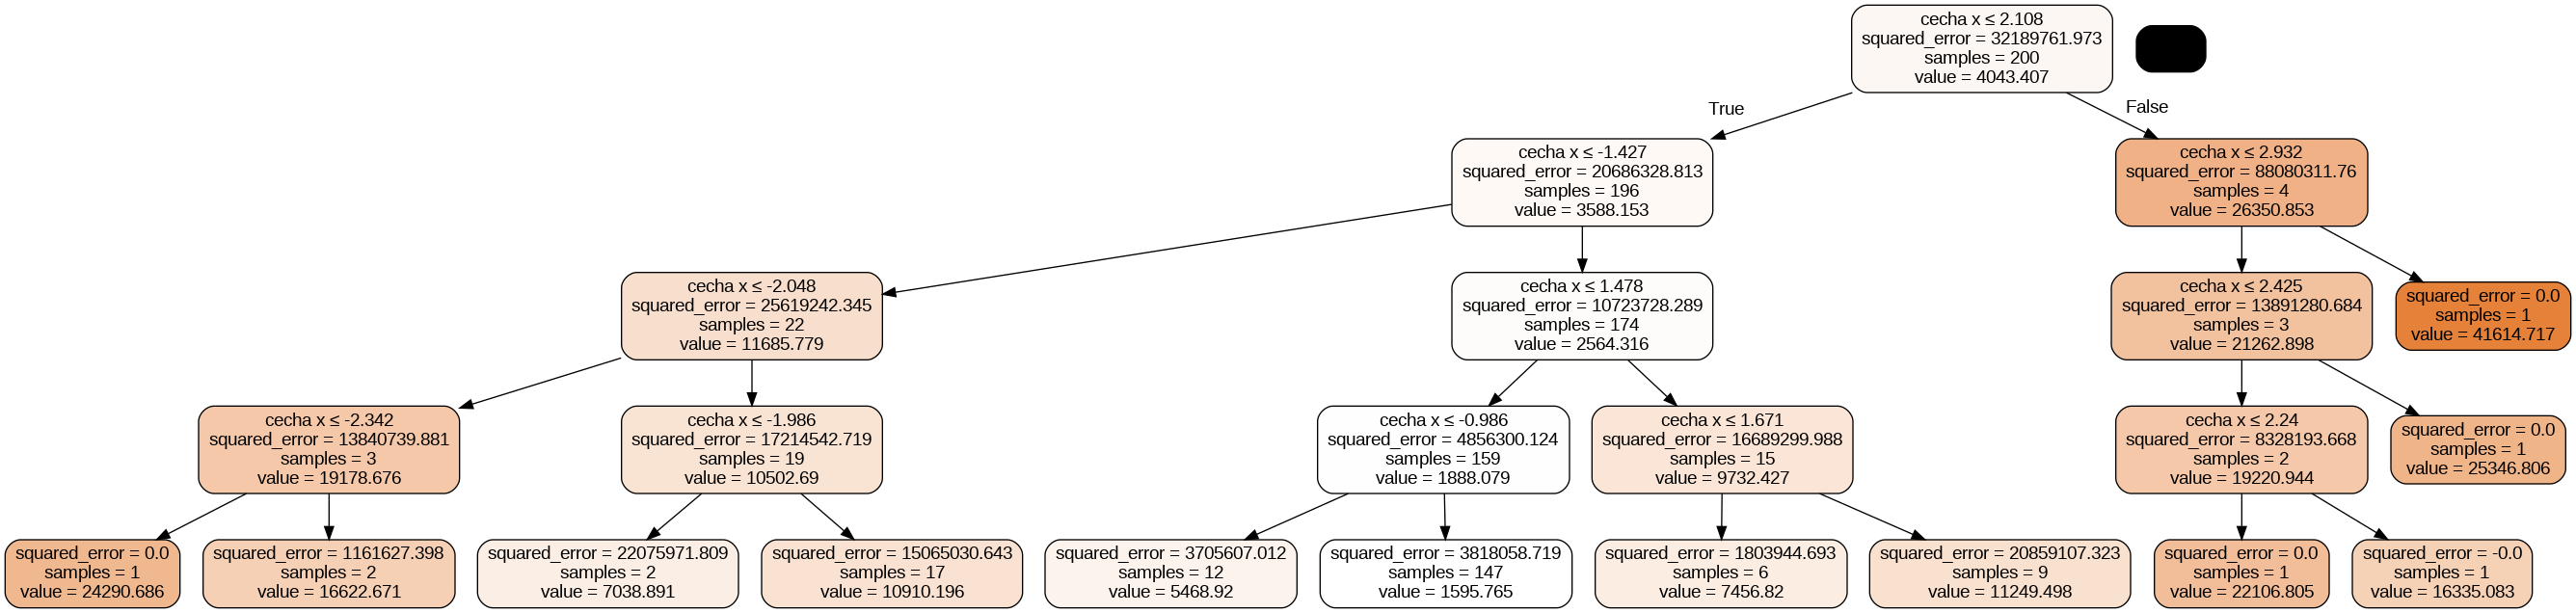

In [29]:
make_dt_regressor(max_depth = 4)